<a href="https://colab.research.google.com/github/BarkhaAnjum/linear-regression/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

from google.colab import files
uploaded = files.upload()




Saving brca.csv to brca (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [3]:
df = pd.read_csv("brca.csv")
print("Shape:", df.shape)
print(df.head())

Shape: (569, 32)
   Unnamed: 0  x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
0           1         13.540           14.36             87.46        566.3   
1           2         13.080           15.71             85.63        520.0   
2           3          9.504           12.44             60.34        273.9   
3           4         13.030           18.42             82.61        523.8   
4           5          8.196           16.84             51.71        201.9   

   x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
0            0.09779             0.08129           0.06664   
1            0.10750             0.12700           0.04568   
2            0.10240             0.06492           0.02956   
3            0.08983             0.03766           0.02562   
4            0.08600             0.05943           0.01588   

   x.concave_pts_mean  x.symmetry_mean  ...  x.texture_worst  \
0            0.047810           0.1885  ...            19.26   
1      

In [6]:
X = df.drop("y", axis=1)
y = df["y"]


if y.dtype == object:
    y = y.map({"M":1, "B":0})

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [9]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

ROC-AUC Score: 1.0


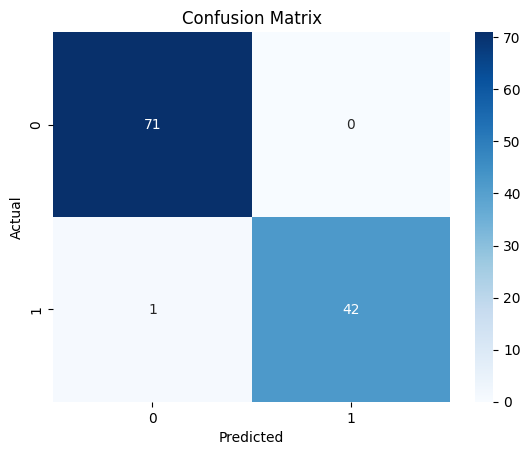

In [10]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

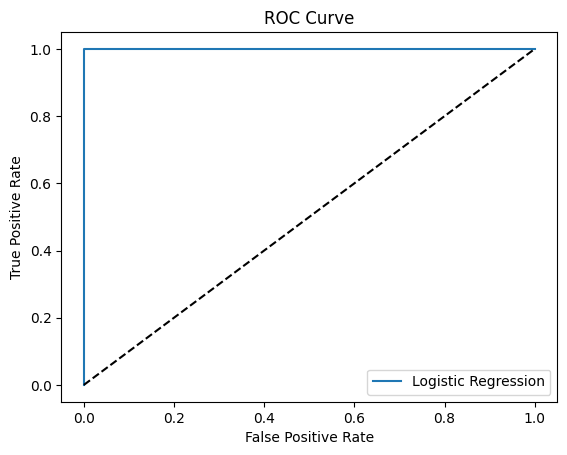

In [11]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()